Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob

Load Dataset

In [2]:
def read_parquet_file(file_path):
    """ Read a parquet file and return a DataFrame"""
    df = pd.read_parquet(file_path)
    return df

def load_quotes_data(lp_quotes_path):
    """ Load liquidity_provider_quotes.parquet file"""
    all_files = glob.glob(lp_quotes_path)
    dataframes = []
    for filename in all_files:
        df = read_parquet_file(filename)
        dataframes.append(df)
    df = pd.concat(dataframes, ignore_index=True)
    return df

lp_quotes_path = '../data/lp_quotes/*.parquet'
lp_quotes = load_quotes_data(lp_quotes_path)

Load Trade Data

In [3]:
trade_data_path = '../data/trade_data/bankofmontreal-e134q-09jrg4pq-trade_data.parquet'
trade_df = read_parquet_file(trade_data_path)

In [27]:
trade_df.head()


,timestamp,side,size,flag
0,2023-01-03 12:00:00,buy,100000,external
1,2023-01-04 03:50:50,buy,100000,external
2,2023-01-15 11:59:50,sell,1000000,external
3,2023-01-11 11:59:50,sell,100000,external
4,2023-01-21 11:59:50,sell,500000,external


**Initial Data Exploration**

In [97]:
# Display the shape and info of the DataFrame
print("Shape of the DataFrame:")
print(lp_quotes.shape)
lp_quotes.info(memory_usage='deep')
lp_quotes.describe(include='all')

Shape of the DataFrame:
(9322560, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9322560 entries, 0 to 9322559
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   lp_id      int64         
 2   side       object        
 3   price      float64       
 4   size       int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 817.9 MB


,timestamp,lp_id,side,price,size
count,9322560,9.322560e+06,9322560,9.322560e+06,9.322560e+06
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,bid,NaN,NaN
freq,NaN,NaN,4661280,NaN,NaN
mean,2023-01-11 14:59:54.999997952,2.384615e+00,NaN,1.120103e+00,4.084615e+07
min,2023-01-01 06:00:00,1.000000e+00,NaN,1.107407e+00,1.000000e+06
25%,2023-01-06 10:29:57.500000,1.000000e+00,NaN,1.118828e+00,3.000000e+06
50%,2023-01-11 14:59:55,2.000000e+00,NaN,1.120006e+00,1.000000e+07
75%,2023-01-16 19:29:52.500000,3.000000e+00,NaN,1.121339e+00,7.500000e+07
max,2023-01-21 23:59:50,5.000000e+00,NaN,1.133213e+00,1.500000e+08


In [98]:
lp_quotes.head(n=100)

,timestamp,lp_id,side,price,size
0,2023-01-15 00:00:00,1,bid,1.120073,1000000
1,2023-01-15 00:00:00,1,ask,1.120386,1000000
2,2023-01-15 00:00:00,1,bid,1.119874,3000000
3,2023-01-15 00:00:00,1,ask,1.120685,3000000
4,2023-01-15 00:00:00,1,bid,1.119691,5000000
...,...,...,...,...,...
95,2023-01-15 00:00:10,4,ask,1.120767,5000000
96,2023-01-15 00:00:10,4,bid,1.115133,50000000
97,2023-01-15 00:00:10,4,ask,1.125384,50000000
98,2023-01-15 00:00:10,4,bid,1.110141,100000000


**Optimizing Memory Usage**

The original dataset DataFrame memory usage is ~ 819MB which is a bit high for my system RAM. In order to make the memory more optimized, I write the following function to change the type of DataFrame columns in order to reduce the memory usage. The dataset memory usage after optimization reduced to 195.6 MB, indicating 75% reduction in memory usage.

In [4]:
def optimize_memory(lp_quotes):
    lp_quotes['lp_id'] = lp_quotes['lp_id'].astype('uint8') # lp_id is a small integer
    lp_quotes['side'] = lp_quotes['side'].astype('category') # side is a categorical variable
    lp_quotes['size'] = pd.to_numeric(lp_quotes['size'], downcast='unsigned') 

    return lp_quotes

lp_quotes = optimize_memory(lp_quotes)
lp_quotes.info(memory_usage='deep')
lp_quotes.head(n=50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9322560 entries, 0 to 9322559
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   lp_id      uint8         
 2   side       category      
 3   price      float64       
 4   size       uint32        
dtypes: category(1), datetime64[ns](1), float64(1), uint32(1), uint8(1)
memory usage: 195.6 MB


,timestamp,lp_id,side,price,size
0,2023-01-15,1,bid,1.120073,1000000
1,2023-01-15,1,ask,1.120386,1000000
2,2023-01-15,1,bid,1.119874,3000000
3,2023-01-15,1,ask,1.120685,3000000
4,2023-01-15,1,bid,1.119691,5000000
5,2023-01-15,1,ask,1.120791,5000000
6,2023-01-15,1,bid,1.119575,10000000
7,2023-01-15,1,ask,1.120994,10000000
8,2023-01-15,1,bid,1.119169,50000000
9,2023-01-15,1,ask,1.121388,50000000


In [7]:
lp_quotes = lp_quotes.sort_values(by=['timestamp'], ascending=True).reset_index(drop=True)

In [8]:
lp_quotes['time_gap'] = lp_quotes['timestamp'].diff()
lp_quotes['gap_seconds'] = lp_quotes['time_gap'].dt.total_seconds()
print(lp_quotes['gap_seconds'].value_counts().head(10))
is_sorted = lp_quotes['timestamp'].is_monotonic_increasing
print(f"Is the DataFrame sorted by timestamp? {is_sorted}")
lp_quotes.head(n=150)

gap_seconds
0.0     9143280
10.0     179279
Name: count, dtype: int64
Is the DataFrame sorted by timestamp? True


,timestamp,lp_id,side,price,size,time_gap,gap_seconds
0,2023-01-01 06:00:00,1,bid,1.118249,1000000,NaT,NaN
1,2023-01-01 06:00:00,2,ask,1.119967,100000000,0 days,0.0
2,2023-01-01 06:00:00,2,bid,1.116356,150000000,0 days,0.0
3,2023-01-01 06:00:00,2,ask,1.120319,150000000,0 days,0.0
4,2023-01-01 06:00:00,3,bid,1.118004,1000000,0 days,0.0
...,...,...,...,...,...,...,...
145,2023-01-01 06:00:20,1,ask,1.119704,150000000,0 days,0.0
146,2023-01-01 06:00:20,2,bid,1.118102,1000000,0 days,0.0
147,2023-01-01 06:00:20,2,ask,1.118661,1000000,0 days,0.0
148,2023-01-01 06:00:20,2,bid,1.117977,3000000,0 days,0.0


**Investigating for missing values and inconsistent data**

In [10]:
def check_missing_values(lp_quotes):
    """ Check for missing values in the DataFrame """
    missing_values = lp_quotes.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    return missing_values

def check_inconsistent_quotes(lp_quotes):
    """ Check for inconsistent values in the DataFrame """
    inconsistent_values = lp_quotes[(lp_quotes['price'] <= 0) | (lp_quotes['size'] <= 0)] # check negative or zero values in price and size columns
    return inconsistent_values

def check_unique_values(lp_quotes):
    """ Check for unique values in the DataFrame """
    print("Unique LP_IDs:", lp_quotes['lp_id'].unique())
    print("Unique sides:", lp_quotes['side'].unique())

def check_duplciate_rows(lp_quotes):
    """ Check for duplicate rows in the DataFrame """
    duplicated_rows = lp_quotes.duplicated().sum()
    print("Number of duplicate rows:", duplicated_rows)

def handle_missing_values(lp_quotes):
    # Check for missing values
    missing_values = check_missing_values(lp_quotes)
    print("Missing values in the DataFrame:")
    print(missing_values)
    # Check for inconsistent values
    inconsistent_values = check_inconsistent_quotes(lp_quotes)
    print(inconsistent_values)
    # Check for unique values
    check_unique_values(lp_quotes)
    # Check for duplicated rows
    check_duplciate_rows(lp_quotes)
    
handle_missing_values(lp_quotes)

Missing values in the DataFrame:
time_gap       1
gap_seconds    1
dtype: int64
Empty DataFrame
Columns: [timestamp, lp_id, side, price, size, time_gap, gap_seconds]
Index: []
Unique LP_IDs: [1 2 3 4 5]
Unique sides: ['bid', 'ask']
Categories (2, object): ['ask', 'bid']
Number of duplicate rows: 0


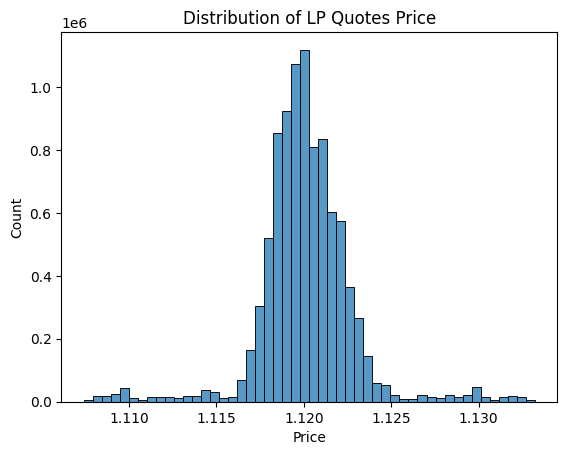

In [105]:
sns.histplot(lp_quotes['price'], bins=50, kde=False)
plt.title('Distribution of LP Quotes Price')
plt.xlabel('Price')
plt.show()

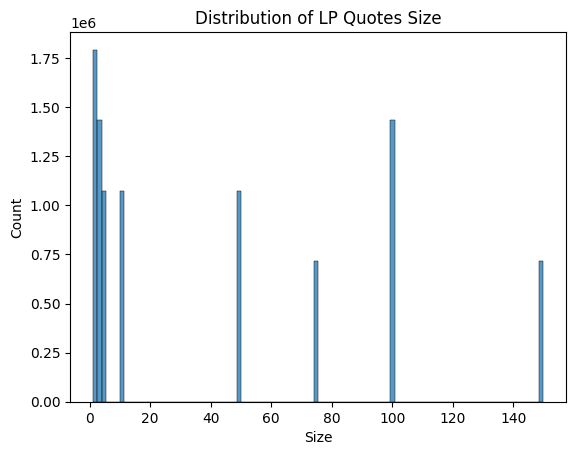

In [106]:
sns.histplot(lp_quotes['size']/1e6, bins=100, kde=False)
plt.title('Distribution of LP Quotes Size')
plt.xlabel('Size')
plt.show()

<Axes: xlabel='price', ylabel='Count'>

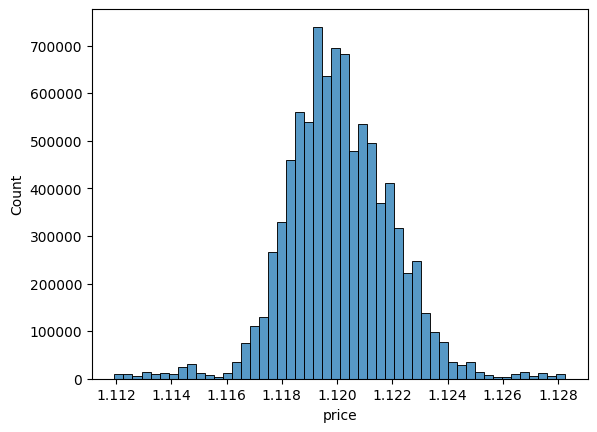

In [11]:
from scipy.stats import zscore
def preprocess_quotes(df, price_col, method, threshold=3):
    """ Preprocess the LP quotes DataFrame  for handling outliers in price and size columns """
    df = df.copy()
    if method=='zscore':
        # Z-score Based Outlier Detection for Price (because of its normal-like distribution)
        df['zscore_price'] = zscore(df[price_col])
        df['price_outlier'] = abs(df['zscore_price']) > threshold

    elif method =='IQR':
        # IQR-Based Outlier Detection for Size
        q1 = df[price_col].quantile(0.25)
        q3 = df[price_col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df['price_outlier']  = (df[price_col] > upper_bound) | (df[price_col] < lower_bound)
    else:
        raise ValueError("Invalid method. Use 'zscore' or 'IQR'.")
    # Remove outliers from the DataFrame
    df_clean = df[~df['price_outlier']].copy() 
    return df_clean, df 

df_clean, df_flagged = preprocess_quotes(lp_quotes, price_col='price', method='zscore', threshold=3)
sns.histplot(df_clean['price'], bins=50, kde=False)


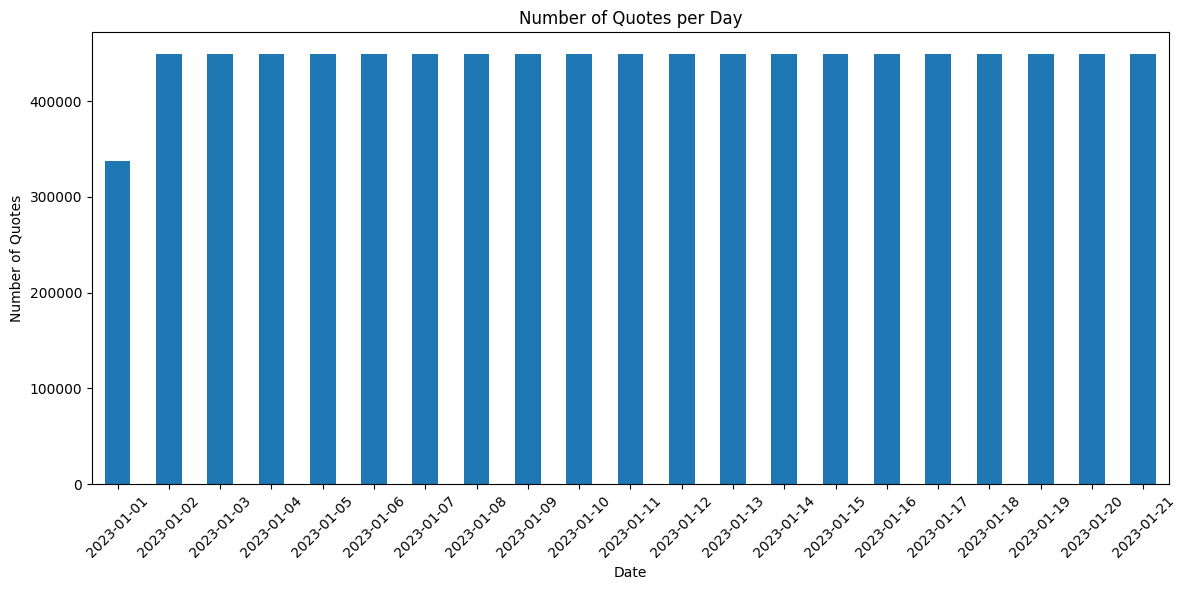

In [8]:
quote_daily = lp_quotes.groupby(lp_quotes['timestamp'].dt.date)
quote_counts = quote_daily.size() 
quote_counts.plot(kind='bar', figsize=(12, 6), ylabel='Number of Quotes', xlabel='Date', title='Number of Quotes per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\pnaza\AppData\Local\Temp\ipykernel_17368\1635732346.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  lp_spread_df = df_clean.pivot_table(


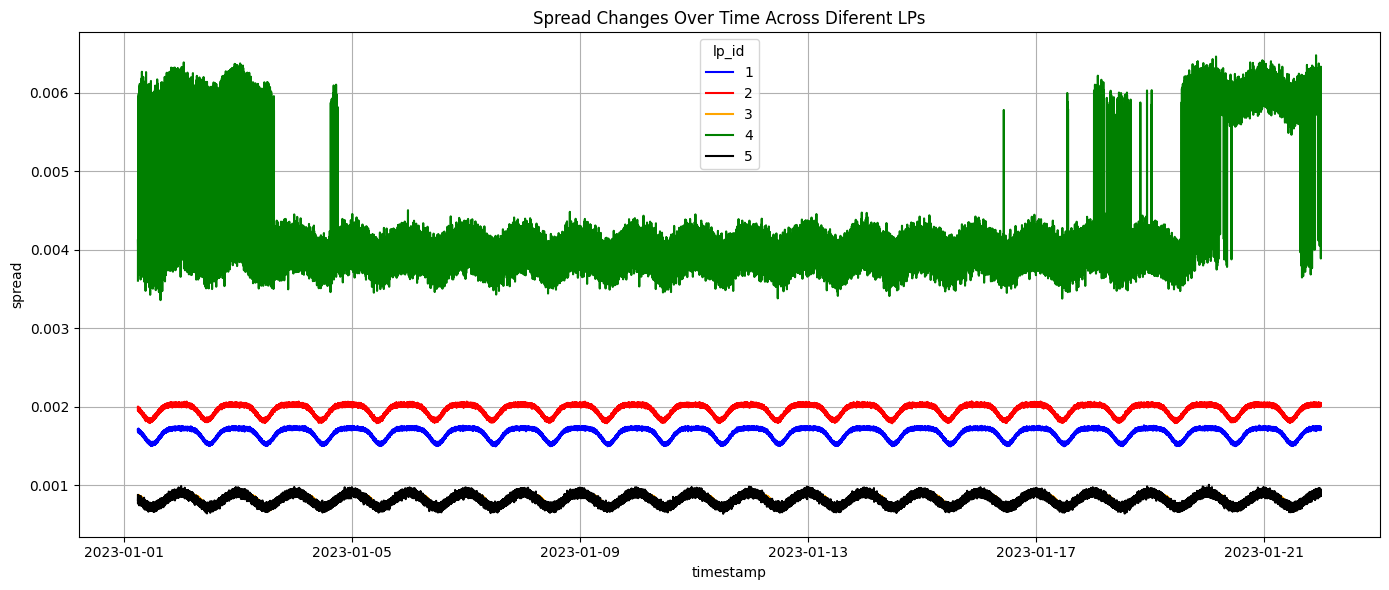

In [160]:
lp_spread_df = df_clean.pivot_table(
    index = ['timestamp', 'lp_id'],
    columns='side',
    values='price',
    aggfunc='mean'
).reset_index()

lp_spread_df['spread'] = lp_spread_df['ask'] - lp_spread_df['bid']
clean_lp_quotes = lp_spread_df[lp_spread_df['spread'] <=0.0006]
plt.figure(figsize=(14,6))
sns.lineplot(data=lp_spread_df, x='timestamp', y='spread', hue='lp_id', palette=['blue', 'red', 'orange', 'green', 'black'])
plt.title('Spread Changes Over Time Across Diferent LPs')
plt.grid(True)
plt.tight_layout()
plt.show()

Graph Interpretation: The values in LP_ID=4 are noisy and involves with a lot of spikes which may impact on the further analysis. So LP_ID=4 is a potential candiate for filtering.

**LP Quote Analytics**

In this section, for computing consolidated order book, I had issue of active memory storage which did not allow to run the code for computing order book. So, I used DASK library for computation which resulted in computing the order book.

Preprocessing timestamps...
computing mid-price...
Building consolidated order book...
Analyzing intraday trends...


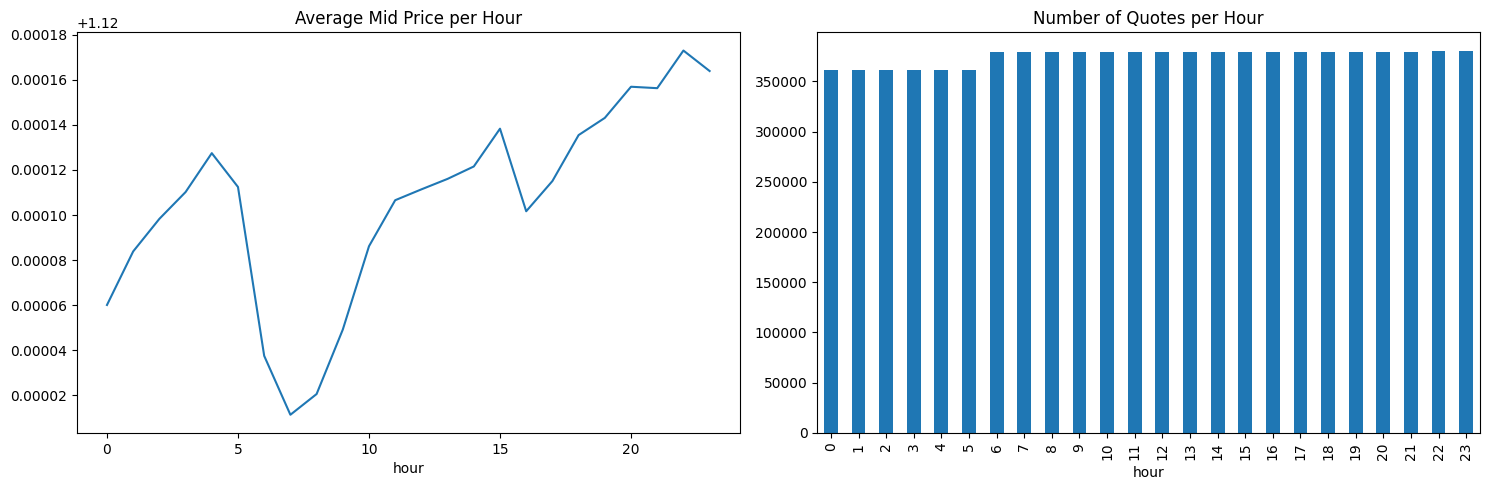

Analyzing daily trends...


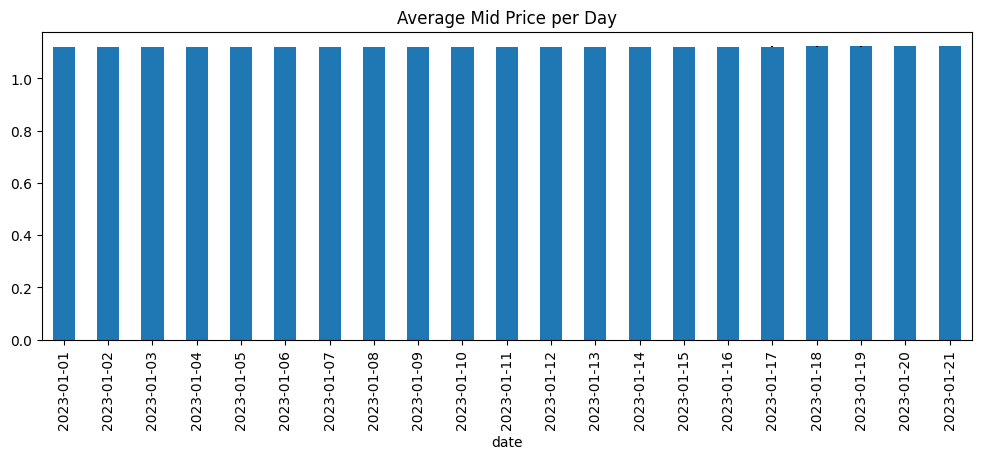

In [ ]:
import dask.dataframe as dd 

def prepare_time_feature(df):
    df = df.copy()
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date
    df['hour'] = df['timestamp'].dt.hour
    df['minute'] = df['timestamp'].dt.minute
    df['second'] = df['timestamp'].dt.second
    return df

def compute_mid_price(df):
    best_bid = df[df['side'] == 'bid'].groupby('timestamp')['price'].max()
    best_ask = df[df['side'] == 'ask'].groupby('timestamp')['price'].min()
    mid_price = (best_bid + best_ask) / 2
    return mid_price.reset_index(name='mid_price')

def get_top_levels(snapshot, levels=5):
    bids = (snapshot[snapshot['side'] == 'bid'].groupby('price')['size'].sum().sort_index(ascending=False).head(levels))
    asks = (snapshot[snapshot['side'] == 'ask'].groupby('price')['size'].sum().sort_index(ascending=True).head(levels))

    return pd.Series({
        'bid_prices': bids.index.tolist(),
        'bid_sizes': bids.values.tolist(),
        'ask_prices': asks.index.tolist(),
        'ask_sizes': asks.values.tolist()
    })

def build_consolidated_order_book(df, levels=5):
    ddf = dd.from_pandas(df)
    consolidated = (ddf.groupby('timestamp')
                    .apply(lambda df: get_top_levels(df, levels), meta={'bid_prices': object, 'bid_sizes': object, 'ask_prices': object, 'ask_sizes': object}) 
                    .reset_index()
                    )

    return consolidated.compute()

def analyze_intraday_trends(df):
    #print(df.head(n=100))
    hourly_mid = df.groupby('hour')['mid_price'].mean()
    quote_counts = df.groupby('hour').size()

    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    hourly_mid.plot(title='Average Mid Price per Hour', ax=ax[0])
    quote_counts.plot(kind='bar', title='Number of Quotes per Hour', ax=ax[1])
    plt.tight_layout()
    plt.show()

def analyze_daily_trends(df):
    daily_mid = df.groupby('date')['mid_price'].mean()
    daily_std = df.groupby('date')['mid_price'].std()
    daily_mid.plot(kind='bar', yerr=daily_std, title='Average Mid Price per Day', figsize=(12, 4))
    plt.show()

def compare_lp_intraday(df):
    bid_quotes = df[df['size'] == 'bid']
    lp_hourly = bid_quotes.groupby(['lp_id', 'hour'])['price'].mean().unstack(0)
    lp_hourly.plot(title='Average Bid Price per Hour by LP', figsize=(15, 5))
    plt.show()

def run_full_lp_analysis(df):
    print("Preprocessing timestamps...")
    df = prepare_time_feature(df)

    print("computing mid-price...")
    mid_price_dd = compute_mid_price(df)
    df = df.merge(mid_price_dd, on='timestamp', how='left') 

    print("Building consolidated order book...")
    order_book = build_consolidated_order_book(df)

    print("Analyzing intraday trends...")
    analyze_intraday_trends(df)

    print("Analyzing daily trends...")
    analyze_daily_trends(df)

    #print("Comparing LPs intraday...")
    #compare_lp_intraday(df)

    return df, order_book
df_with_mid, order_book = run_full_lp_analysis(df_clean)

In [17]:
print(order_book.head(n=10))

            timestamp                                         bid_prices  \
0 2023-01-01 06:00:00  [1.11843093, 1.11824887, 1.11808407, 1.1180113...   
1 2023-01-01 06:00:10  [1.11825039, 1.1182216, 1.11807657, 1.1180388,...   
2 2023-01-01 06:00:20  [1.11822779, 1.11821506, 1.11810199, 1.1180705...   
3 2023-01-01 06:00:30  [1.11824797, 1.11824527, 1.11805896, 1.1180421...   
4 2023-01-01 06:00:40  [1.11823627, 1.11815018, 1.11810287, 1.1180575...   
5 2023-01-01 06:00:50  [1.11822466, 1.11816035, 1.11811634, 1.1180833...   
6 2023-01-01 06:01:00  [1.11823663, 1.11815623, 1.11811932, 1.1180530...   
7 2023-01-01 06:01:10  [1.118213, 1.1181894, 1.11813858, 1.11806498, ...   
8 2023-01-01 06:01:20  [1.11823936, 1.11812708, 1.11810895, 1.1180576...   
9 2023-01-01 06:01:30  [1.11826231, 1.11810733, 1.11808845, 1.1180615...   

                                        bid_sizes  \
0   [1000000, 1000000, 1000000, 1000000, 1000000]   
1   [1000000, 1000000, 1000000, 3000000, 1000000]   
2   

**Mid and Spread Model**

In this section, I build my own quotes model. Among different strategies such as TOB quoting, SOR, VWAP, etc. I selected VWAP because it aggregates multiple levels fromm LPs and quotes at VWAP for a target size. Additionally, it can adjust spread based on liquidity depth. So, I found this model would be a potential good model for this challenge. 

In [ ]:
liquidty_levels = [1, 3, 5, 10, 50, 75, 100, 150] # pre-defined in task challenge document

def compute_vwap(prices, sizes, target_liq, top_price=None, max_price_diff=0.002, min_size=1e6, size_cap=5e6):
    """ Compute the VWAP for a given liquidity level """
    cum_size = 0
    vwap_sum = 0
    size_cap = min(size_cap, target_liq * 0.2)
    for p, s in zip(prices, sizes):
        if s < min_size:
            continue
        if top_price is not None and abs(p - top_price) > max_price_diff:
            continue
        take_size = min(s, target_liq - cum_size, size_cap)
        vwap_sum += p * take_size
        cum_size += take_size      
        
        if cum_size >= target_liq:
            break
        
    return vwap_sum / target_liq if cum_size > 0 else np.nan

def compute_vwap_for_order_book(order_book, liquidty_levels):
    """ Compute the VWAP for each liquidity level in the order book """
    liq_thresholds = [lql * 1000000 for lql in liquidty_levels]
    results = []

    for _, row in order_book.iterrows():
        ts = row['timestamp']
        bid_prices = row['bid_prices']
        bid_sizes = row['bid_sizes']
        ask_prices = row['ask_prices']
        ask_sizes = row['ask_sizes']

        if bid_prices and bid_sizes:
            bids = sorted(zip(bid_prices, bid_sizes), key=lambda x: -x[0]) # Descending order for bids
            sorted_bid_prices, sorted_bid_sizes = zip(*bids)
        else:
            sorted_bid_prices, sorted_bid_sizes = [], []
        if ask_prices and ask_sizes:
            asks = sorted(zip(ask_prices, ask_sizes), key=lambda x: x[0])
            sorted_ask_prices, sorted_ask_sizes = zip(*asks) # Ascending order for asks
        else:
            sorted_ask_prices, sorted_ask_sizes = [], []

        best_bid = sorted_bid_prices[0] if sorted_bid_prices else None 
        best_ask = sorted_ask_prices[0] if sorted_ask_prices else None

        for liq, liq_target in zip(liquidty_levels, liq_thresholds):
            vwap_bid = compute_vwap(sorted_bid_prices, sorted_bid_sizes, liq_target, top_price=best_bid)
            vwap_ask = compute_vwap(sorted_ask_prices, sorted_ask_sizes, liq_target, top_price=best_ask)
            mid = (vwap_bid + vwap_ask) / 2 if pd.notna(vwap_bid) and pd.notna(vwap_ask) and vwap_ask > vwap_bid else np.nan
            spread = (vwap_ask - vwap_bid) if pd.notna(vwap_bid) and pd.notna(vwap_ask) and vwap_ask > vwap_bid else np.nan
            
            results.append({
                'timestamp': ts,
                'liquidity_level': liq,
                'vwap_bid': vwap_bid,
                'vwap_ask': vwap_ask,
                'mid_price': mid,
                'spread': spread
            })

    return pd.DataFrame(results)


Inventory-Aware Quote Adjustment

In [122]:
def apply_inventory_skew(quotes_df, inventory_df, max_inventory=20000000, spread_limit=0.0001, bid_agg=0.7, ask_agg=0.4, min_spread = 0.0005):
    """ Apply inventory skew to the quotes DataFrame """
    merged = pd.merge_asof(
        quotes_df.sort_values('timestamp'),
        inventory_df.sort_values('timestamp'),
        on='timestamp',
        direction='backward'
    )
    merged['inventory'] = merged['inventory'].fillna(0)
    # Imbalance + skew amount
    imbalance = np.clip(merged['inventory'] / max_inventory, -1, 1)
    skew_amt = imbalance * spread_limit
    # Base mid and spread (ensure mid spread)
    merged['effective_spread'] = merged['spread'].apply(lambda s: max(s, min_spread))
    merged['mid_price'] = (merged['vwap_bid'] + merged['vwap_ask']) / 2

    # Apply side-specific aggressiveness
    bid_half = (merged['effective_spread'] / 2) *(1 - bid_agg)
    ask_half = (merged['effective_spread'] / 2) * (1 + ask_agg)
    # Apply skew 
    merged['adj_bid'] = merged['mid_price'] - bid_half - skew_amt
    merged['adj_ask'] = merged['mid_price'] + ask_half + skew_amt
    # Enforce no crossing
    half_spread = min_spread / 2
    merged['adj_bid'] = np.minimum(merged['adj_bid'], merged['adj_ask'] - half_spread)
    merged['adj_ask'] = np.maximum(merged['adj_ask'], merged['adj_bid'] + half_spread)

    return merged

**Metrics Evaluation**

After building model, the effectiveness of the model is assessed using metrics defined in the task challenge document, including: 
1.	Bid and Ask Crossing: Evaluate the frequency and magnitude of bid and ask prices crossing each other. This metric helps in understanding the liquidity and price stability in the market.
2.	Top of the Book Coverage: Measure the percentage of time the model's bid and ask prices are at the top of the order book. This indicates the competitiveness of the model in attracting trades.
3.	LP Ranking: Rank liquidity providers based on their quote quality, response time, and consistency. This helps in identifying the most reliable LPs for market-making.
4.	Continuous Size Interpolation: Assess the model's ability to interpolate sizes continuously between quoted levels. This ensures that the model can handle varying order sizes effectively.
5.	Spread Width Analysis: Analyze the width of the bid-ask spread over time. A narrower spread indicates better market efficiency and higher liquidity.
6.	Market Impact: Evaluate the impact of the model's quotes on the overall market. This includes assessing how the model's prices influence market movements and liquidity.
7.	Price Stability: Measure the stability of the model's bid and ask prices over time. This helps in understanding the robustness of the model in different market conditions.

In [123]:
def bid_ask_crosing(quotes_df):
    """ Check for bid-ask crossing in the quotes DataFrame """
    crossed = quotes_df[quotes_df['adj_bid'] >= quotes_df['adj_ask']]
    crossing_rate = len(crossed) / len(quotes_df)
    crossing_magnitude = (crossed['adj_bid'] - crossed['adj_ask']).mean()
    return crossing_rate, crossing_magnitude

def top_of_book_coverage(quotes_df, order_book):
    merged = quotes_df.merge(order_book[['timestamp', 'bid_prices', 'ask_prices']], on='timestamp', how='inner')

    merged['top_bid'] = merged['bid_prices'].apply(lambda bids: max(bids))
    merged['top_ask'] = merged['ask_prices'].apply(lambda asks: min(asks))

    merged['at_top_bid'] = merged['adj_bid'] >= merged['top_bid']
    merged['at_top_ask'] = merged['adj_ask'] <= merged['top_ask']

    return merged['at_top_bid'].mean(), merged['at_top_ask'].mean()
    
def lp_ranking(quotes_df, n_top=1):
    """ Rank liquidity providers based on the number of quotes """
    ranks = []
    for side in ['bid', 'ask']:
        side_col = f'{side}_prices'
        side_order = -1 if side == 'bid' else 1
    for _, row in quotes_df.iterrows():
        prices = row[side_col]
        if not prices: continue
        top_prices = sorted(prices)[:n_top]
        for i, price in enumerate(top_prices):
            ranks.append((row['timestamp'], side, i, price))
    rank_df = pd.DataFrame(ranks, columns=['timestamp', 'side', 'rank', 'price'])
    return rank_df.groupby(['side', 'rank'])['price'].mean().reset_index()

def interpolate_size(quotes_df, order_book, price_Step=0.0001):
    results = []
    merged = quotes_df.merge(order_book[['timestamp', 'bid_prices', 'bid_sizes','ask_prices', 'ask_sizes']], on='timestamp', how='left')

    for _, row in merged.iterrows():
        try:
            bid = row['vwap_bid']
            ask = row['vwap_ask']
            if pd.isna(bid) or pd.isna(ask):
                continue
            price_range = np.arange(bid, ask, price_Step)
            bid_dict = dict(zip(row['bid_prices'], row['bid_sizes'])) if row['bid_prices'] else {}
            ask_dict = dict(zip(row['ask_prices'], row['ask_sizes'])) if row['ask_prices'] else {}

            interpolated_sizse = []
            for price in price_range:
                bid_size = bid_dict.get(round(price, 5), 0)
                ask_size = ask_dict.get(round(price, 5), 0)
                interpolated_sizse.append(bid_size + ask_size)
            avg_size = np.mean(interpolated_sizse)

            results.append({
                'timestamp': row['timestamp'],
                'mean_interpolated_size': avg_size
            })
        except Exception as e:
            print(f"Error processing row: {e}")
            continue
    # Convert results to DataFrame
    return pd.DataFrame(results)

def spread_with_analysis(quotes_df):
    """ Analyze the spread in the quotes DataFrame """
    avg_spread = quotes_df['adj_ask'].sub(quotes_df['adj_bid']).mean()
    min_spread = quotes_df['adj_ask'].sub(quotes_df['adj_bid']).min()
    max_spread = quotes_df['adj_ask'].sub(quotes_df['adj_bid']).max()

    return avg_spread, min_spread, max_spread

def price_stability(quotes_df):
    """ Check for price stability in the quotes DataFrame """
    bid_vol = quotes_df['adj_bid'].diff().abs().mean()
    ask_vol = quotes_df['adj_ask'].diff().abs().mean()
    return bid_vol, ask_vol

def market_impact(quotes_df, trade_df, max_latency_ms=1000):
    """ Check for market impact in the quotes DataFrame """
    internal = trade_df[trade_df['flag'] == 'internal'].copy()
    merged = pd.merge_asof(
        internal.sort_values('timestamp'),
        quotes_df.sort_values('timestamp'),
        on='timestamp',
        direction='backward',
        tolerance=pd.Timedelta(milliseconds=max_latency_ms)
    )
    matched = merged['liquidity_level'].notna()
    impact_rate = matched.mean()

    return impact_rate

def evaluate_metrics(quotes_df, trade_df, order_book):

    crossing_rate, crossing_magnitude = bid_ask_crosing(quotes_df)
    crossing_metrics = {"Crossing Rate": round(crossing_rate, 2), "Crossing Magnitude": round(crossing_magnitude, 6)}

    top_of_book_bid, top_of_book_ask = top_of_book_coverage(quotes_df, order_book)
    top_of_books_coverage_metrics = {"Top-of-Book Bid": round(top_of_book_bid, 2), "Top-of-Book Ask": round(top_of_book_ask, 6)}

    avg_spread, min_spread, max_spread = spread_with_analysis(quotes_df)
    spread_metrics = {"Average Spread": round(avg_spread, 6), "Minimum Spread": round(min_spread, 6), "Maximum Spread": round(max_spread, 6)}

    bid_vol, ask_vol = price_stability(quotes_df)
    price_stability_metrics = {"Bid Volatility": round(bid_vol, 6), "Ask Volatility": round(ask_vol, 6)}

    market_impact_rate = market_impact(quotes_df, trade_df)
    market_impact_metrics = {"Market Impact Rate": round(market_impact_rate, 2)}

    Metrics = {
        **crossing_metrics,
        **top_of_books_coverage_metrics,
        **spread_metrics,
        **price_stability_metrics,
        **market_impact_metrics
    }

    return pd.DataFrame(Metrics.items(), columns=['Metric', 'Value'])

Apply In-sample vs Out-of-Sample

In [124]:
def split_in_out_sample(df, test_ratio=0.2):
    df = df.sort_values("timestamp")
    cutoff = int(len(df) * (1 - test_ratio))
    return df.iloc[:cutoff], df.iloc[cutoff:]

**Integrating All codes**

In [144]:
liquidty_levels = [1, 3, 5, 10, 50, 100, 150]
# Compute VWAP for the order book
quotes_df = compute_vwap_for_order_book(order_book, liquidty_levels)
# Load and compute inventory
inventory_df = (
    trade_df[trade_df['flag'] == 'internal']
    .assign(signed_size=lambda df: df['size'] * df['side'].map({'buy': 1, 'sell': -1}))
    .groupby('timestamp')['signed_size'].sum()
    .cumsum().reset_index(name='inventory')
)
# Apply inventory-aware quote skewing
quotes_with_skew = apply_inventory_skew(quotes_df, inventory_df)
# Split IN-SAMPLE / OUT-OF-SAMPLE
quotes_train, quotes_test = split_in_out_sample(quotes_with_skew, test_ratio=0.2)
#quotes_train, quotes_test = split_in_out_sample(quotes_df, test_ratio=0.2)
trade_train, trade_test = split_in_out_sample(trade_df, test_ratio=0.2)

# Evaluation
metrics_train = evaluate_metrics(quotes_train, trade_train, order_book)
metrics_test = evaluate_metrics(quotes_test, trade_test, order_book)

metrics_train['Set'] = 'In-Sample'
metrics_test['Set'] = 'Out-of-Sample'

all_metrics = pd.concat([metrics_train, metrics_test])


**Metrics Evaluation Visualization**

=== Evaluation Metrics ===


Set,In-Sample,Out-of-Sample
Metric,,
Ask Volatility,0.376360,0.377582
Average Spread,0.014187,0.014265
Bid Volatility,0.380478,0.381676
Crossing Magnitude,NaN,NaN
Crossing Rate,0.000000,0.000000
Market Impact Rate,1.000000,0.960000
Maximum Spread,0.286467,0.286731
Minimum Spread,0.000250,0.000250
Top-of-Book Ask,0.343246,0.343393


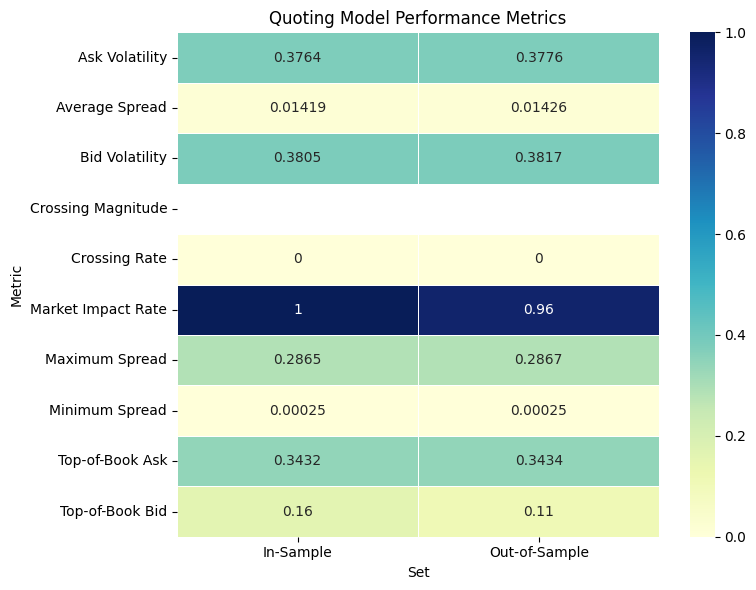

In [145]:
print("=== Evaluation Metrics ===")
display(all_metrics.pivot(index='Metric', columns='Set', values='Value'))

plt.figure(figsize=(8, 6))
sns.heatmap(all_metrics.pivot(index='Metric', columns='Set', values='Value'), annot=True, fmt=".4g", cmap="YlGnBu", linewidth=0.5)
plt.title("Quoting Model Performance Metrics")
plt.tight_layout()
plt.show()

In [63]:
interploated = interpolate_size(quotes_with_skew, order_book)
print(interploated.head(n=10))

d:\bmo_challenge\myenv_bmo\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\bmo_challenge\myenv_bmo\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000002E9C2444B50>>
Traceback (most recent call last):
  File "d:\bmo_challenge\myenv_bmo\Lib\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


<Axes: title={'center': 'Interpolated Size'}, xlabel='timestamp'>

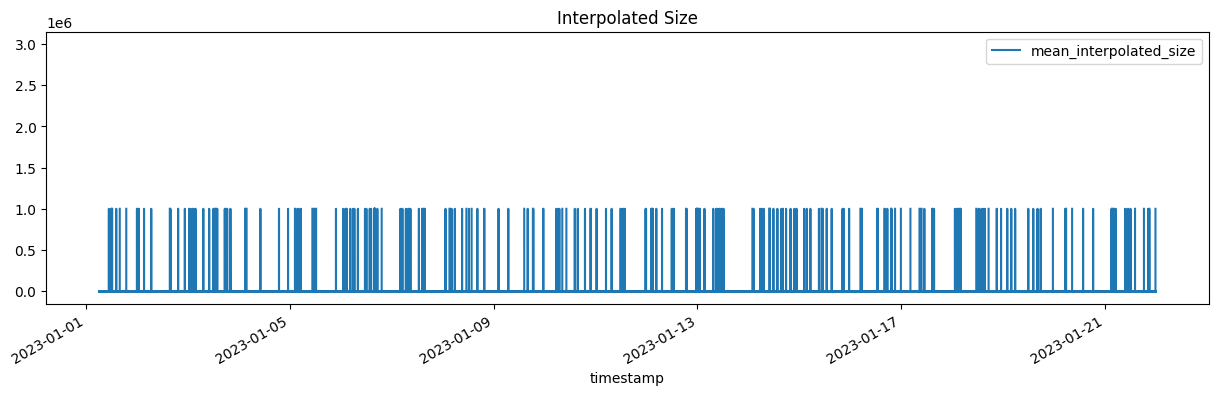

In [62]:
interploated.plot(x='timestamp', y='mean_interpolated_size', kind='line', figsize=(15, 4), title='Interpolated Size')

**Visualizing Mid and Spread Changes Across Time**

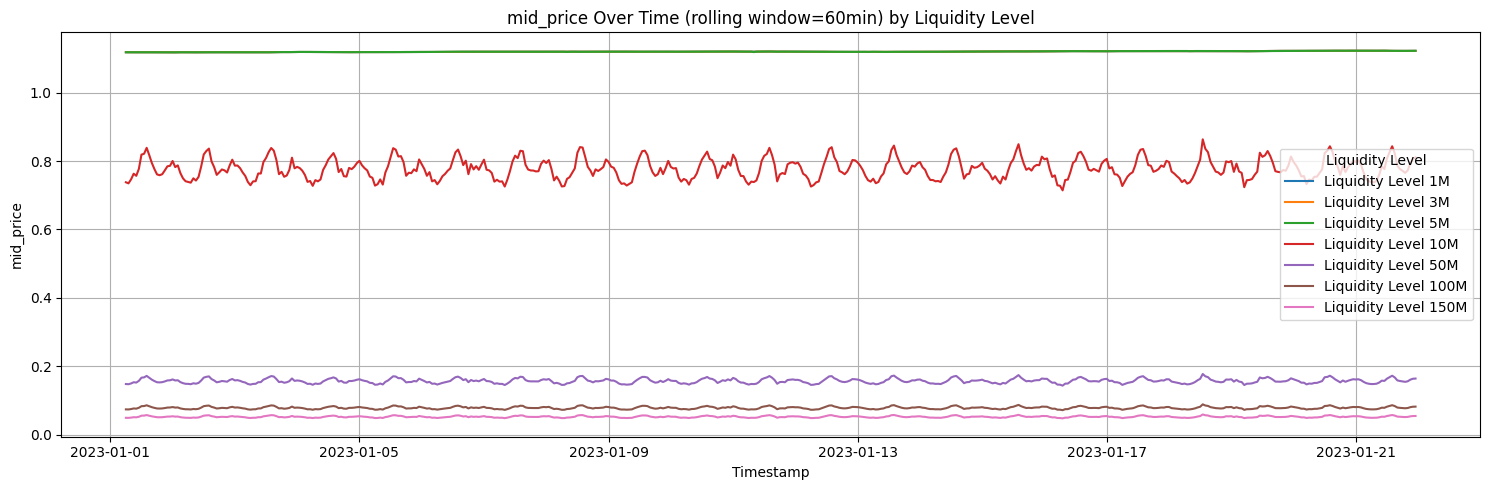

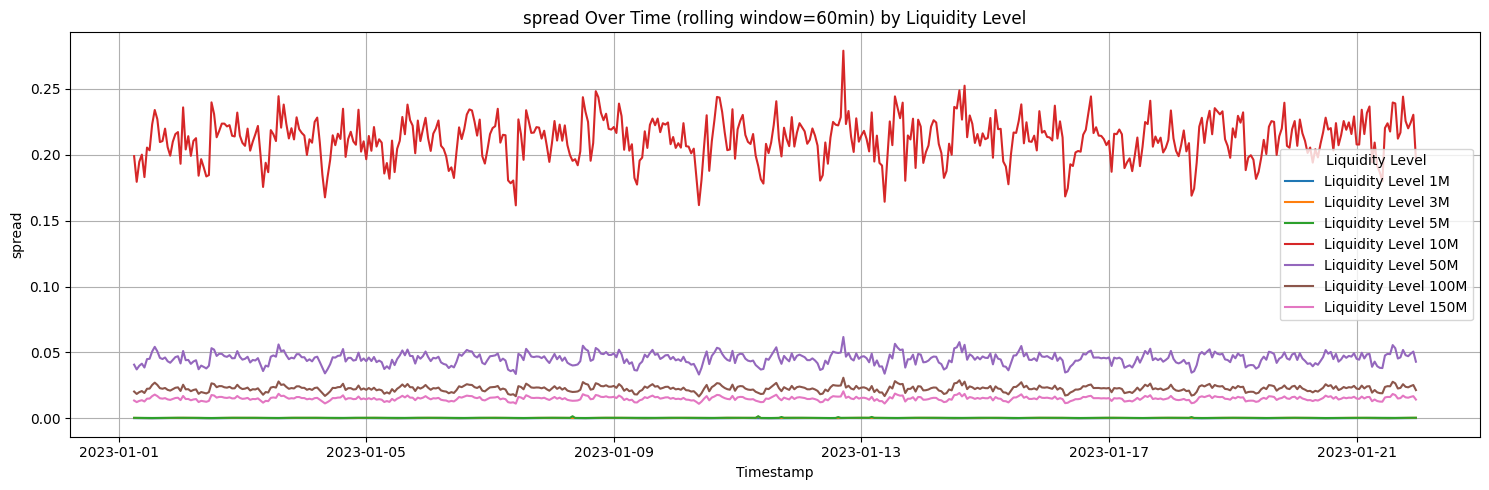

In [127]:
def plot_vwap(quotes_df, col_name, levels, rolling_window='5min'):
    """ Plot VWAP over time for different liquidity levels """

    #if col_name != "mid_price" and col_name != "spread":
    #    raise ValueError("col_name must be either 'mid_price' or 'spread'")
     
    quotes_df['timestamp'] = pd.to_datetime(quotes_df['timestamp'])
    plt.figure(figsize=(15, 5))
    for lvl in levels:
        subset = quotes_df[quotes_df['liquidity_level'] == lvl]
        subset = subset.resample(rolling_window, on='timestamp').mean().dropna().reset_index()
        plt.plot(subset['timestamp'], subset[col_name], label=f'Liquidity Level {lvl}M')
    plt.title(f'{col_name} Over Time (rolling window={rolling_window}) by Liquidity Level')
    plt.xlabel('Timestamp') 
    plt.ylabel(col_name)
    plt.legend(title='Liquidity Level')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

levels = [1, 3, 5, 10, 50, 100, 150] # unit in milions
# Plot Mid Price Over Time by Liquidity Level
plot_vwap(quotes_df, col_name='mid_price', levels=levels, rolling_window='60min')
plot_vwap(quotes_df, col_name='spread', levels=levels, rolling_window='60min')


**Visualizing My QUotes with Individual LP Quotes**

C:\Users\pnaza\AppData\Local\Temp\ipykernel_17368\2432905335.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivoted = df_clean.pivot_table(


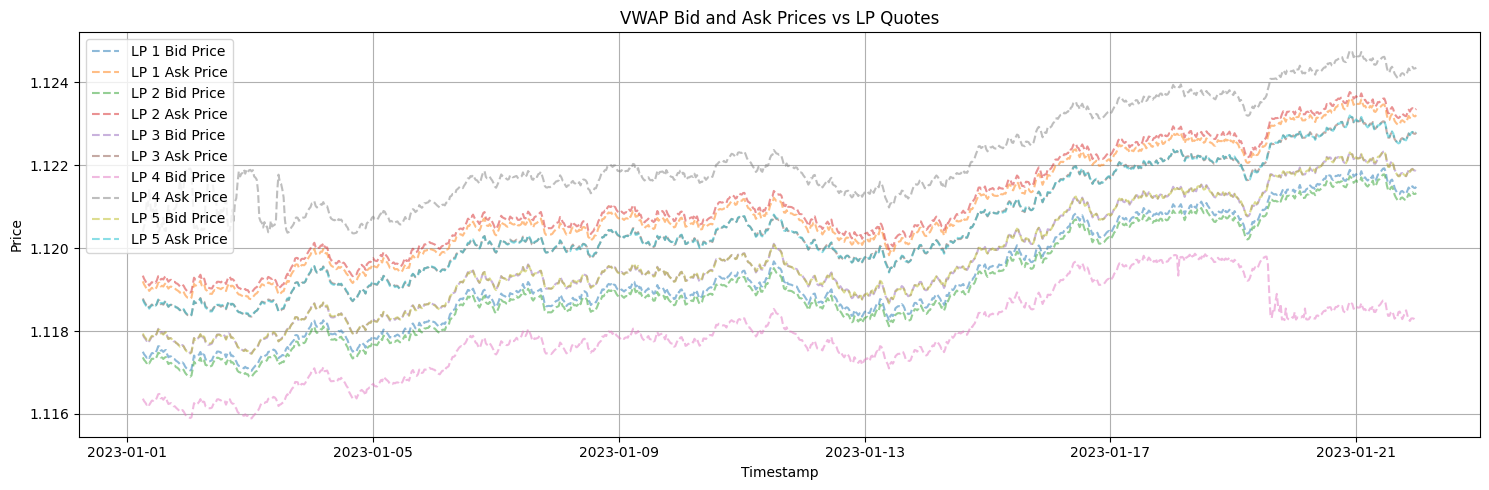

In [148]:
selected_level = 50
vwap_5m = quotes_df[quotes_df['liquidity_level'] == selected_level].copy()

pivoted = df_clean.pivot_table(
    index='timestamp',
    columns=['lp_id', 'side'],
    values='price',
    aggfunc='mean'
).reset_index()
pivoted.columns = ['timestamp' if col[0] == 'timestamp' else f'LP{col[0]}_{col[1]}' for col in pivoted.columns]
merged = vwap_5m.merge(pivoted, on='timestamp', how='inner')
merged_subset = merged.resample('30min', on='timestamp').mean().dropna().reset_index()

plt.figure(figsize=(15, 5))
#plt.plot(merged_subset['timestamp'], merged_subset['vwap_bid'], label='VWAP Bid Price', color='blue', linewidth=1)
#plt.plot(merged_subset['timestamp'], merged_subset['vwap_ask'], label='VWAP Ask Price', color='red', linewidth=1)

for lp in lp_quotes['lp_id'].unique():
    bid_col = f'LP{lp}_bid'
    ask_col = f'LP{lp}_ask'
    if bid_col in merged_subset.columns:
        plt.plot(merged_subset['timestamp'], merged_subset[bid_col], label=f'LP {lp} Bid Price', linestyle='--', alpha=0.5)
    if ask_col in merged_subset.columns:
        plt.plot(merged_subset['timestamp'], merged_subset[ask_col], label=f'LP {lp} Ask Price', linestyle='--', alpha=0.5)

plt.title('VWAP Bid and Ask Prices vs LP Quotes')
plt.xlabel('Timestamp')     
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [150]:
lp_spread_df = df_clean.pivot_table(
    index = ['timestamp', 'lp_id'],
    columns='side',
    values='price',
    aggfunc='mean'
).reset_index()

lp_spread_df['spread'] = lp_spread_df['ask'] - lp_spread_df['bid']
clean_lp_quotes = lp_spread_df[lp_spread_df['spread'] <=0.0006]

C:\Users\pnaza\AppData\Local\Temp\ipykernel_17368\2801228326.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  lp_spread_df = df_clean.pivot_table(


<Axes: xlabel='timestamp', ylabel='spread'>

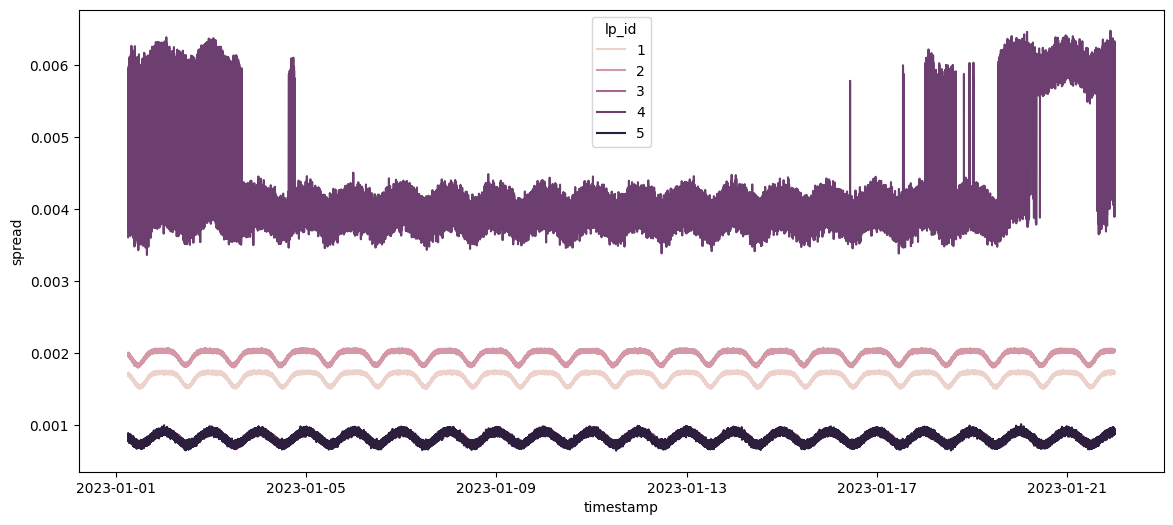

In [151]:
plt.figure(figsize=(14,6))
sns.lineplot(data=lp_spread_df, x='timestamp', y='spread', hue='lp_id')

OTHER

In [ ]:
#vwap_rows = []
for _, row in order_book.iterrows():
    ts = row['timestamp']
    bid_prices = row['bid_prices']
    bid_sizes = row['bid_sizes']
    ask_prices = row['ask_prices']
    ask_sizes = row['ask_sizes']

    for liq, liq_target in zip(liquidty_levels, liq_thresholds):
        vwap_bid = compute_vwap(bid_prices, bid_sizes, liq_target)
        vwap_ask = compute_vwap(ask_prices, ask_sizes, liq_target)
        mid = (vwap_bid + vwap_ask) / 2 if pd.notna(vwap_bid) and pd.notna(vwap_ask) else np.nan
        spread = vwap_ask - vwap_bid if pd.notna(vwap_bid) and pd.notna(vwap_ask) else np.nan
        vwap_rows.append({
            'timestamp': ts,
            'liquidity_level': liq,
            'vwap_bid': vwap_bid,
            'vwap_ask': vwap_ask,
            'mid_price': mid,
            'spread': spread
        }
        )

#vwap_df = pd.DataFrame(vwap_rows)
#print(vwap_df.head(n=10))

In [ ]:
vwap_df['timestamp'] = pd.to_datetime(vwap_df['timestamp'])

selected_levels = [1, 3]
# Plot Mid Price Over Time by Liquidity Level
plt.figure(figsize=(15, 5))
for lvl in selected_levels:
    subset = vwap_df[vwap_df['liquidity_level'] == lvl]
    subset = subset.resample('5min', on='timestamp').mean().dropna().reset_index()
    plt.plot(subset['timestamp'], subset['mid_price'], label=f'Liquidity Level {lvl}M')
plt.title('Mid Price Over Time by Liquidity Level')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.legend(title='Liquidity Level')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Spread Over Time by Liquidity Level
plt.figure(figsize=(15, 5))
for lvl in selected_levels:
    subset = vwap_df[vwap_df['liquidity_level'] == lvl]
    subset = subset.resample('5min', on='timestamp').mean().dropna().reset_index()
    plt.plot(subset['timestamp'], subset['spread'], label=f'Liquidity Level {lvl}M')
plt.title('Spread Over Time by Liquidity Level')
plt.xlabel('Timestamp')
plt.ylabel('Spread (Ask - Bid)')
plt.legend(title='Liquidity Level')
plt.grid(True)
plt.tight_layout()
plt.show()

Strategy Planning

In [40]:
def generate_quote(vwap_df, aggressiveness=0.5, min_spread=0.00005):
    """ Generate bid/ask quotes based on mid and spread for each row.
    Paarmters:
    - aggssiveness: Aggressiveness of the quote: 0 (very passive) to 1 (very aggressive).
    - min_spread: Minimum spread between bid and ask prices to ensure profitability.
    """
    df = vwap_df.copy()

    df = df.dropna(subset=['mid_price', 'spread'])
    df['effective_spread'] = df['spread'].apply(lambda s: max(s, min_spread))

    df['bid_quote'] = df['mid_price'] - (df['effective_spread'] / 2) * (1 - aggressiveness)
    df['ask_quote'] = df['mid_price'] + (df['effective_spread'] / 2) * (1 - aggressiveness)

    return df
my_quote_df = generate_quote(vwap_df, aggressiveness=0.5, min_spread=0.00005)
print(my_quote_df[['timestamp', 'liquidity_level', 'bid_quote', 'ask_quote']].head(n=10))

            timestamp  liquidity_level  bid_quote  ask_quote
0 2023-01-01 06:00:00                1   1.118352   1.118377
1 2023-01-01 06:00:00                3   1.118310   1.118422
2 2023-01-01 06:00:00                5   1.118255   1.118453
3 2023-01-01 06:00:00               10   0.615061   0.727027
4 2023-01-01 06:00:00               50   0.123012   0.145405
5 2023-01-01 06:00:00               75   0.082008   0.096937
6 2023-01-01 06:00:00              100   0.061506   0.072703
7 2023-01-01 06:00:00              150   0.041004   0.048468
8 2023-01-01 06:00:10                1   1.118320   1.118460
9 2023-01-01 06:00:10                3   1.118278   1.118469


Visualize My Own QUotes Over Time

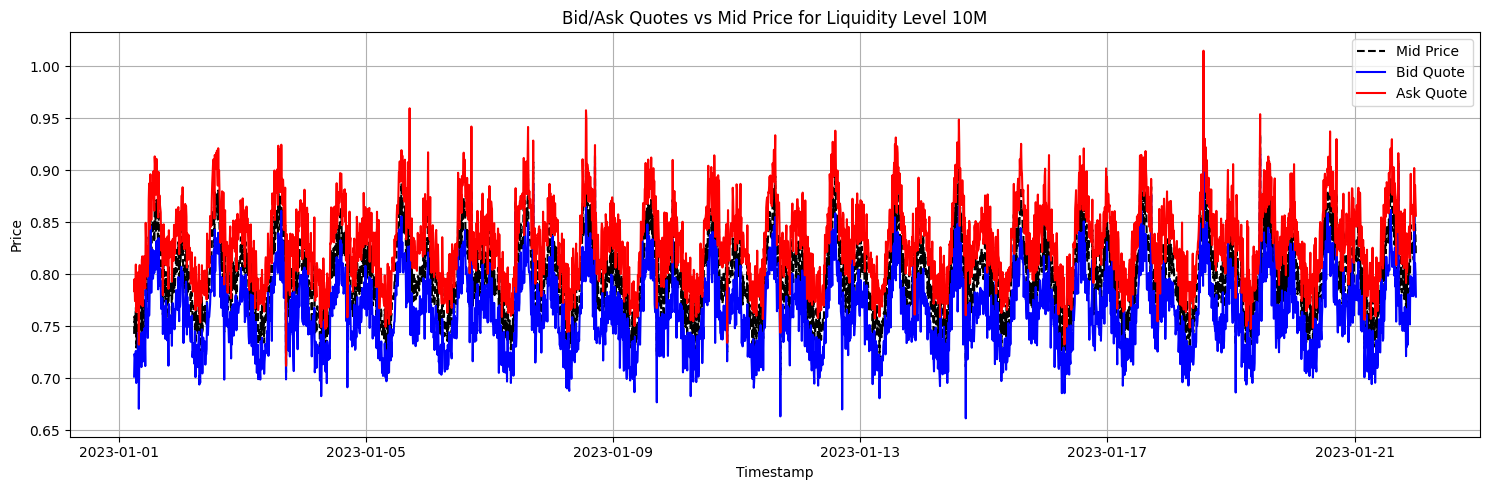

In [44]:
level = 10
df_lvl = my_quote_df[my_quote_df['liquidity_level'] == level]
df_lvl = df_lvl.resample('10min', on='timestamp').mean().dropna().reset_index()

plt.figure(figsize=(15, 5))
plt.plot(df_lvl['timestamp'], df_lvl['mid_price'], label='Mid Price', color='black', linestyle='--')
plt.plot(df_lvl['timestamp'], df_lvl['bid_quote'], label='Bid Quote', color='blue')
plt.plot(df_lvl['timestamp'], df_lvl['ask_quote'], label='Ask Quote', color='red')
plt.title(f'Bid/Ask Quotes vs Mid Price for Liquidity Level {level}M')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

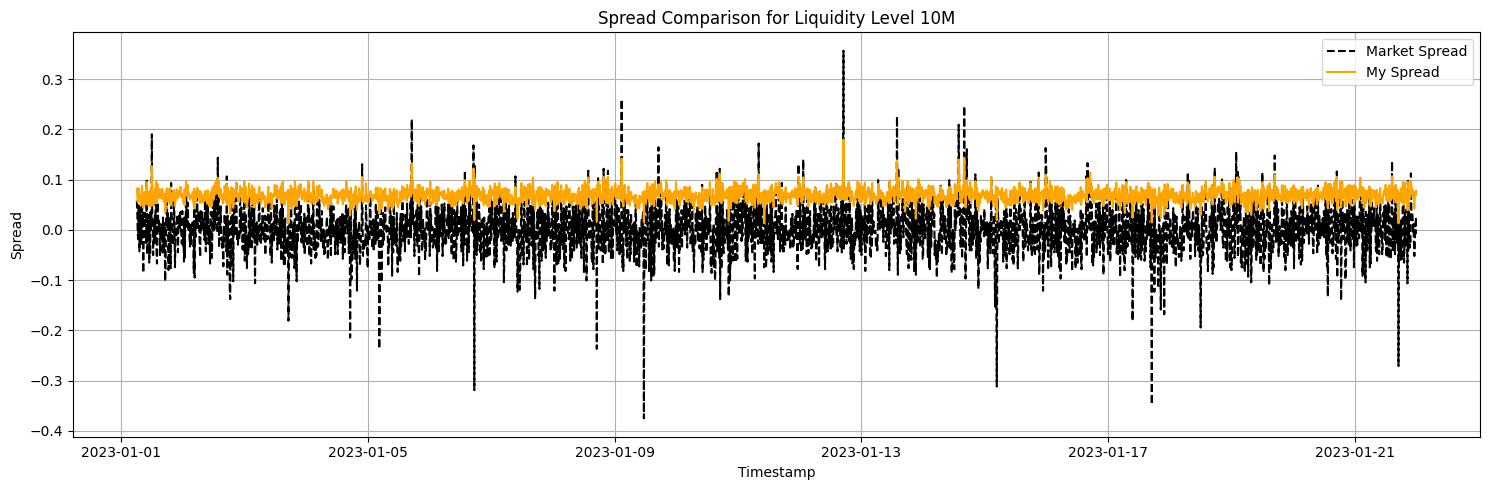

In [46]:
level = 10
df_lvl = my_quote_df[my_quote_df['liquidity_level'] == level]
df_lvl = df_lvl.resample('10min', on='timestamp').mean().dropna().reset_index()

plt.figure(figsize=(15, 5))
plt.plot(df_lvl['timestamp'], df_lvl['spread'], label='Market Spread', color='black', linestyle='--')
plt.plot(df_lvl['timestamp'], df_lvl['ask_quote'] - df_lvl['bid_quote'], label='My Spread', color='orange')
plt.title(f'Spread Comparison for Liquidity Level {level}M')
plt.xlabel('Timestamp')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Baccktest Strategy

In [48]:
def backtest_quotes(quotes_df, raw_book_df, fill_size=1000000):
    """ Simulate fills and compute PnL for each timestamp. """
    df = quotes_df.copy()
    df['fill_bid'] = False
    df['fill_ask'] = False
    df['pnl'] = 0.0

    for i, row in df.iterrows():
        ts = row['timestamp']
        level = row['liquidity_level']

        # Get actual best bid/ask aat that time'level
        actual_row = raw_book_df[(raw_book_df['timestamp'] == ts) & (raw_book_df['liquidity_level'] == level)]
        if actual_row.empty:
            continue

        best_bid = actual_row['vwap_bid'].values[0]
        best_ask = actual_row['vwap_ask'].values[0]

        if row['bid_quote'] >= best_bid:
            df.at[i, 'fill_bid'] = True
            df.at[i, 'pnl'] += (best_bid - row['bid_quote']) * fill_size
        if row['ask_quote'] <= best_ask:
            df.at[i, 'fill_ask'] = True
            df.at[i, 'pnl'] += (row['ask_quote'] - best_ask) * fill_size
    
    return df

backtest_df = backtest_quotes(my_quote_df, vwap_df, fill_size=1000000)
# Plo cumulative PnL
backtest_df['cumulative_pnl'] = backtest_df['pnl'].cumsum()
plt.figure(figsize=(15, 5))
plt.plot(backtest_df['timestamp'], backtest_df['cumulative_pnl'], label='Cumulative PnL', color='green')
plt.title('Simulated Cumulative Profit')
plt.xlabel('Time')
plt.ylabel('PnL (Curreny Units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 